# 1. Use Sigmoid--->一顆神經元

## 你是一個Deep Learning 專家，針對以下的數據，撰寫深度學習的Python 訓練模型，預測 Diabetic ，過程中使用 Sequential class 方式加上callback與劃出callback訓練結果


### PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
### 1354778,0,171,80,34,23,43.50972593,1.213191354,21,0
### 1147438,8,92,93,47,36,21.24057571,0.158364981,23,0
### 1640031,7,115,47,52,35,41.51152348,0.079018568,23,0
### 1883350,9,103,78,25,304,29.58219193,1.282869847,43,1
### 1424119,1,85,59,27,35,42.60453585,0.549541871,22,0
### 1619297,0,82,92,9,253,19.72416021,0.103424498,26,0
### 1660149,0,133,47,19,227,21.94135672,0.174159779,21,0

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

data = pd.read_csv('diabetes.csv')  

# 分割数据为特征 (X) 和标签 (y)
X = data.iloc[:, 1:-1]  # 使用除了PatientID和Diabetic列之外的所有列作为特征
y = data['Diabetic']

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建 Sequential 模型
model = keras.Sequential()

# 添加输入层
model.add(layers.Input(shape=(X_train.shape[1],)))

# 添加隐藏层
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# 添加输出层
model.add(layers.Dense(1, activation='sigmoid'))  # 二元分类问题，使用 sigmoid 激活函数

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose = 2, validation_data=(X_test, y_test))

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test)
print(f'测试集上的损失：{loss}')
print(f'测试集上的准确率：{accuracy}')


Epoch 1/50
750/750 - 2s - loss: 0.4048 - accuracy: 0.8066 - val_loss: 0.3534 - val_accuracy: 0.8327 - 2s/epoch - 3ms/step
Epoch 2/50
750/750 - 1s - loss: 0.3187 - accuracy: 0.8575 - val_loss: 0.3069 - val_accuracy: 0.8647 - 760ms/epoch - 1ms/step
Epoch 3/50
750/750 - 1s - loss: 0.2883 - accuracy: 0.8753 - val_loss: 0.2852 - val_accuracy: 0.8753 - 758ms/epoch - 1ms/step
Epoch 4/50
750/750 - 1s - loss: 0.2701 - accuracy: 0.8889 - val_loss: 0.2758 - val_accuracy: 0.8787 - 763ms/epoch - 1ms/step
Epoch 5/50
750/750 - 1s - loss: 0.2574 - accuracy: 0.8916 - val_loss: 0.2738 - val_accuracy: 0.8840 - 759ms/epoch - 1ms/step
Epoch 6/50
750/750 - 1s - loss: 0.2470 - accuracy: 0.8976 - val_loss: 0.2532 - val_accuracy: 0.8933 - 763ms/epoch - 1ms/step
Epoch 7/50
750/750 - 1s - loss: 0.2371 - accuracy: 0.9011 - val_loss: 0.2464 - val_accuracy: 0.8970 - 774ms/epoch - 1ms/step
Epoch 8/50
750/750 - 1s - loss: 0.2294 - accuracy: 0.9065 - val_loss: 0.2489 - val_accuracy: 0.8910 - 764ms/epoch - 1ms/step
Epo

In [2]:
print(history.history.keys())
history.history['accuracy'][:3]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


[0.8065833449363708, 0.8575000166893005, 0.875333309173584]

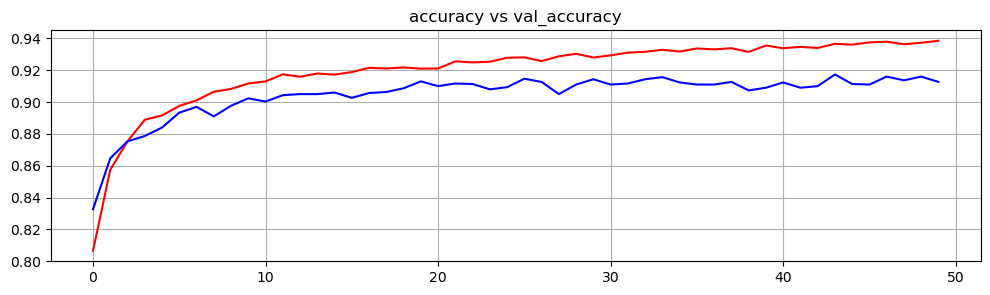

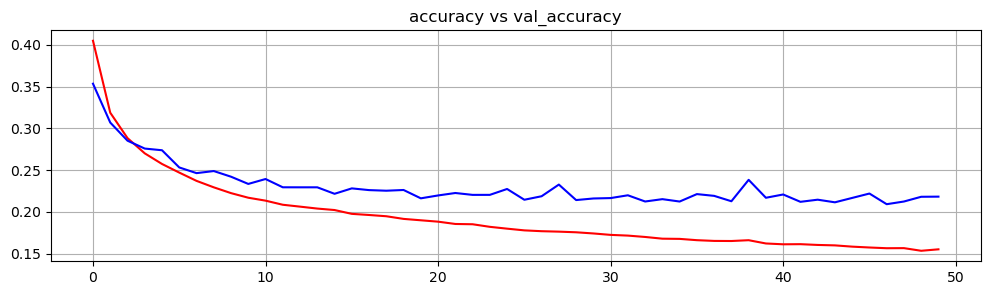

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.title('accuracy vs val_accuracy')
plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'], color = 'blue')
plt.grid()
plt.title('accuracy vs val_accuracy')
plt.show()

# 1. Use Sigmoid--->一顆神經元

In [4]:
# 预测新数据
new_data = np.array([[100, 70, 30, 40, 20, 35, 0.5, 30]])  # 替换为你的新数据
new_data = scaler.transform(new_data)
prediction = model.predict(new_data)
print(f'预测结果：{prediction[0][0]}')

1/1 [==============================] - 0s 88ms/step
预测结果：1.0


d:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# practice

### 請輸出類似以下的結果 :
### PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age, Diabetic(0, 1), Predict(0, 1),Accuracy(正確, 錯誤)


### (np.where( ) / ravel( )---->np)

In [5]:
import numpy as np
data = pd.read_csv('diabetes.csv')
all_data = data.iloc[:, 1:-1].values
all_data = scaler.transform(all_data)
all_prediction = model.predict(all_data) # 因為最後一顆神經元是1個 使用sigmoid 數字輸出(0..1),不能用argmax
data['Predict'] = np.where( (all_prediction.ravel() >= 0.5) == True, 1, 0)
data[:3]  #將所有預測轉換成一階張量後 判斷生病機率是否大(等)於 0.5 若就是有病 否則就是正常
          #np.where 針對陣列批次轉換成為另外顯示資料，類似單一值 if else


d:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


469/469 [==============================] - 0s 830us/step


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Predict
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,0


In [6]:
data['Accuracy'] = (data['Diabetic']==data['Predict'] )
data['Accuracy'] = data['Accuracy'].apply(lambda x : '正確' if x == True else '錯誤')
data[:3]

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Predict,Accuracy
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,0,正確
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,0,正確
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,0,正確


In [7]:
data.to_excel('diabetes.xlsx', index = None)

# 2. Use Softmax--->2顆神經元
## (更改輸出層)